# 1.
В файле data_for_tasks_3.csv информация о заказах пользователей в интернет-магазине. Названия столбцов:
orderId — идентификатор заказа;
userId — идентификатор пользователя, совершившего заказ;
group — группа A/B-теста;
revenue — выручка заказа;
date — дата заказа.
Найдите число заказов по пользователям — создайте датафрейм c двумя столбцами: 'userId' и 'orders'. Назовите его ordersByUsers. Отсортируйте по убыванию количества заказов пользователей и выведите на экран первые 10 строк.

Подсказка
Найдите число заказов по пользователям выражением: data.drop(['...', '...', '...'], axis=1).groupby('...', as_index=False).agg({'...' : pd.Series.nunique}). Вместо '...' укажите нужные названия столбцов.
Переименуйте столбцы датафрейма ordersByUsers методом df.columns.
Отсортируйте данные методом sort_values(by='...',ascending=False). Параметру by передайте название столбца 'orders'.


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

data = pd.read_csv(filepath_or_buffer='datasets/data_for_tasks_3.csv', sep=',')
data['date'] = data['date'].map(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))

print(data.head(5))
ordersByUsers = data.drop(columns=['group','revenue','date'])\
    .groupby(by='userId', as_index=False)\
    .agg({'orderId':pd.Series.nunique})\
    .sort_values(by='orderId', ascending=False)
ordersByUsers.columns = ['user_id','orders']
print(ordersByUsers.head(10))
# Метод .groupby('...', as_index=False) сгруппирует заказы по пользователям
# Метод .agg({'...' : '...',}) посчитает агрегированные метрики на сгруппированных данных
# Метод pd.Series.nunique подсчитает число уникальных заказов
# Метод .sort_values(by='...',ascending=False) отсортирует датафрейм по значению в столбце

         userId group       orderId  revenue       date
0  1.815263e+19     B  4.612878e+15      489 2019-04-22
1  1.815263e+19     B  4.612878e+15      489 2019-04-22
2  1.794078e+19     B  4.136278e+18       97 2019-04-22
3  1.794078e+19     B  4.136278e+18      279 2019-04-22
4  2.461477e+18     B  1.406554e+19     4092 2019-04-22
           user_id  orders
1570  1.724475e+19      13
1085  1.172579e+19      10
122   1.216361e+18      10
567   6.234396e+18       7
1227  1.323237e+19       6
48    4.867316e+17       6
1681  1.823218e+19       6
437   4.843340e+18       6
337   3.862204e+18       5
1422  1.549293e+19       5


# 2.
Постройте гистограмму распределения числа заказов по пользователям методом hist().

Подсказка
Примените метод plt.hist() к столбцу 'orders' датафрейма ordersByUsers.

            userId  orders
1570  1.724475e+19      13
1085  1.172579e+19      10
122   1.216361e+18      10
567   6.234396e+18       7
1227  1.323237e+19       6
48    4.867316e+17       6
1681  1.823218e+19       6
437   4.843340e+18       6
337   3.862204e+18       5
1422  1.549293e+19       5


(array([1.662e+03, 2.000e+01, 6.000e+00, 3.000e+00, 4.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

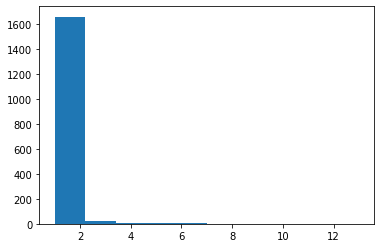

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

data = pd.read_csv(filepath_or_buffer='datasets/data_for_tasks_3.csv', sep=',')
data['date'] = data['date'].map(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))

ordersByUsers = (
    data.groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

plt.hist(ordersByUsers['orders'])

3.
Постройте диаграмму методом scatter(). Напомним, что ему передают значения по осям X и Y.
Значения по горизонтальной оси есть в прекоде, в переменной x_values — сгенерированные номера наблюдений. Значения для вертикальной оси возьмите из столбца 'orders' датафрейма ordersByUsers.

Подсказка
Передайте методу plt.scatter() параметры x_values и ordersByUsers['orders'].

            userId  orders
1570  1.724475e+19      13
1085  1.172579e+19      10
122   1.216361e+18      10
567   6.234396e+18       7
1227  1.323237e+19       6
48    4.867316e+17       6
1681  1.823218e+19       6
437   4.843340e+18       6
337   3.862204e+18       5
1422  1.549293e+19       5


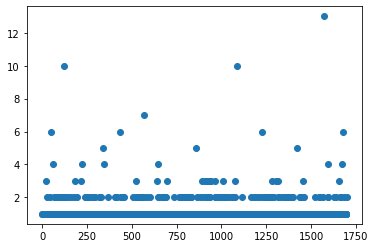

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

data = pd.read_csv(filepath_or_buffer='datasets/data_for_tasks_3.csv', sep=',')
data['date'] = data['date'].map(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))

ordersByUsers = (
    data.groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x=x_values,
            y=ordersByUsers['orders'])

# 4.
Посчитайте 90-й, 95-й и 99-й выборочные перцентили количества заказов по пользователям методом np.percentile(). Результат выведите на экран.

Подсказка
Передайте методу np.percentile() столбец 'orders' датафрейма ordersByUsers и список перцентилей — [90, 95, 99].

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

data = pd.read_csv(filepath_or_buffer='datasets/data_for_tasks_3.csv', sep=',')
data['date'] = data['date'].map(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))

ordersByUsers = (
    data.groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
print(np.percentile(a=ordersByUsers['orders'],
              q=[90,95,99]))

# 5.
Постройте гистограмму распределения выручек ('revenue') с заказов по пользователям методом hist().

Подсказка
Примените метод plt.hist() к столбцу 'revenue' датафрейма data.

            userId group       orderId  revenue       date
2401  1.077474e+19     B  1.410074e+19  1955100 2019-04-05
2400  1.077474e+19     B  1.410074e+19  1955100 2019-04-05
4775  1.724475e+19     A  1.216495e+19   947700 2019-03-18
405   5.829727e+18     A  7.037920e+18   579081 2019-04-18
5334  9.419044e+18     B  9.456631e+18   570000 2019-03-14
5333  9.419044e+18     B  9.456631e+18   570000 2019-03-14
5411  1.724475e+19     A  4.155511e+17   522900 2019-03-13
278   1.279059e+19     A  6.765099e+18   490000 2019-04-19
277   1.279059e+19     A  6.765099e+18   490000 2019-04-19
4218  7.095291e+18     A  5.752271e+18   449100 2019-03-23


(array([5.802e+03, 3.000e+00, 1.100e+01, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([1.5000000e+01, 1.9552350e+05, 3.9103200e+05, 5.8654050e+05,
        7.8204900e+05, 9.7755750e+05, 1.1730660e+06, 1.3685745e+06,
        1.5640830e+06, 1.7595915e+06, 1.9551000e+06]),
 <BarContainer object of 10 artists>)

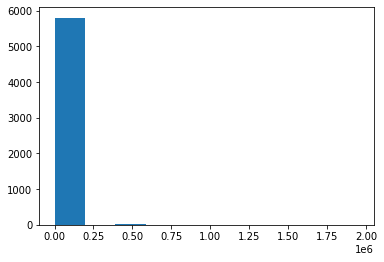

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

data = pd.read_csv(filepath_or_buffer='datasets/data_for_tasks_3.csv', sep=',')
data['date'] = data['date'].map(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))

print(data.sort_values(by='revenue', ascending=False).head(10))

plt.hist(x=data['revenue'])

# 6.
Постройте диаграмму методом scatter(). Напомним, что ему передают значения по осям X и Y.
Значения по горизонтальной оси есть в прекоде, в переменной x_values — сгенерированные номера наблюдений. Значения для вертикальной оси возьмите из столбца 'revenue' датафрейма data.

Подсказка
Передайте методу plt.scatter() параметры x_values и data['revenue'].

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

data = pd.read_csv(filepath_or_buffer='datasets/data_for_tasks_3.csv', sep=',')
data['date'] = data['date'].map(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))

print(data.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(data['revenue'])))
plt.scatter(x=x_values,
            y=data['revenue'])

# 7.
Посчитайте 90-й, 95-й и 99-й выборочные перцентили выручки с заказов по пользователям методом np.percentile(). Результат выведите на экран.

Подсказка
Передайте методу np.percentile() столбец 'revenue' датафрейма data и список перцентилей — [90, 95, 99].

In [20]:
import pandas as pd
import numpy as np
import datetime as dt

data = pd.read_csv(filepath_or_buffer='datasets/data_for_tasks_3.csv', sep=',')
data['date'] = data['date'].map(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))

print(data.head(10))

print(np.percentile(a=data['revenue'], q=[90,95,99]))

         userId group       orderId  revenue       date
0  1.815263e+19     B  4.612878e+15      489 2019-04-22
1  1.815263e+19     B  4.612878e+15      489 2019-04-22
2  1.794078e+19     B  4.136278e+18       97 2019-04-22
3  1.794078e+19     B  4.136278e+18      279 2019-04-22
4  2.461477e+18     B  1.406554e+19     4092 2019-04-22
5  1.419853e+19     A  5.370143e+18      139 2019-04-22
6  1.419853e+19     A  5.370143e+18      370 2019-04-22
7  1.419853e+19     A  5.370143e+18     1732 2019-04-22
8  1.419853e+19     A  5.370143e+18      174 2019-04-22
9  1.419853e+19     A  5.370143e+18      399 2019-04-22
[ 3899.   7740.  43569.9]
